# Gold & Silver Rally: VaR + Stress Testing Analysis
**Portfolio:** $100K Gold/Silver Miners  
**Period:** 2024-2026 (2 years)  
**Objective:** Quantify downside risk at current elevated precious metals prices

**Author:** Zhraan Sheikh  
**Date:** January 31 2026

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yahooquery import Ticker
from scipy import stats
from datetime import datetime, timedelta

# Set style for clean visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 60)
print("GOLD & SILVER RALLY: VaR + STRESS TEST ANALYSIS")
print("=" * 60)

# Define portfolio (riding the precious metals rally)
portfolio = {
    'GOLD': 0.20,   # Barrick Gold - 20%
    'NEM': 0.15,    # Newmont - 15%
    'AEM': 0.15,    # Agnico Eagle - 15%
    'AG': 0.15,     # First Majestic Silver - 15%
    'PAAS': 0.10,   # Pan American Silver - 10%
    'HL': 0.05,     # Hecla Mining - 5%
    'FCX': 0.10,    # Freeport-McMoRan - 10%
    'WPM': 0.10     # Wheaton Precious Metals - 10%
}

# Portfolio value
portfolio_value = 100_000  # $100K portfolio

print("\n📊 PORTFOLIO COMPOSITION:")
print("-" * 60)
for ticker, weight in portfolio.items():
    value = portfolio_value * weight
    print(f"{ticker:6s}: {weight*100:5.1f}% → ${value:>10,.0f}")
print("-" * 60)
print(f"{'TOTAL':6s}: 100.0% → ${portfolio_value:>10,.0f}")
print()

GOLD & SILVER RALLY: VaR + STRESS TEST ANALYSIS

📊 PORTFOLIO COMPOSITION:
------------------------------------------------------------
GOLD  :  20.0% → $    20,000
NEM   :  15.0% → $    15,000
AEM   :  15.0% → $    15,000
AG    :  15.0% → $    15,000
PAAS  :  10.0% → $    10,000
HL    :   5.0% → $     5,000
FCX   :  10.0% → $    10,000
WPM   :  10.0% → $    10,000
------------------------------------------------------------
TOTAL : 100.0% → $   100,000



In [109]:
prices = pd.DataFrame()

for ticker in tickers:
    try:
        print(f"   Fetching {ticker}...", end=" ")
        stock = Ticker(ticker)
        hist = stock.history(period='2y', interval='1d')
        
        # Clean the data
        if isinstance(hist.index, pd.MultiIndex):
            hist = hist.reset_index(level=0, drop=True)
        
        # Fix timezone
        if hasattr(hist.index, 'tz') and hist.index.tz is not None:
            hist.index = hist.index.tz_localize(None)
        
        # Add to dataframe
        prices[ticker] = hist['close']
        
        
    except Exception as e:
        print(f"❌ Error: {e}")

# Clean up
prices = prices.ffill().dropna()

print(f"\n✅ Price data shaped: {prices.shape}")
print(f"   Columns: {list(prices.columns)}")
print(f"\n📈 Latest prices (most recent 5 days):")
print(prices.tail())


   Fetching GOLD...    Fetching NEM...    Fetching AEM...    Fetching AG...    Fetching PAAS...    Fetching HL...    Fetching FCX...    Fetching WPM... 
✅ Price data shaped: (502, 8)
   Columns: ['GOLD', 'NEM', 'AEM', 'AG', 'PAAS', 'HL', 'FCX', 'WPM']

📈 Latest prices (most recent 5 days):
                 GOLD         NEM         AEM         AG       PAAS  \
date                                                                  
2026-01-26  44.099998  125.919998  215.410004  25.719999  64.820000   
2026-01-27  51.150002  127.000000  216.160004  25.719999  64.309998   
2026-01-28  53.990002  131.949997  222.990005  26.230000  65.919998   
2026-01-29  53.529999  126.930000  215.509995  25.170000  63.290001   
2026-01-30  51.849998  112.349998  190.500000  20.840000  54.599998   

                   HL        FCX         WPM  
date                                          
2026-01-26  29.969999  61.169998  147.860001  
2026-01-27  28.309999  62.869999  149.380005  
2026-01-28  27.190001  

In [111]:
print("\n" + "=" * 60)
print("STEP 2: CALCULATING RETURNS & PORTFOLIO PERFORMANCE")
print("=" * 60)

# Calculate daily log returns
returns = np.log(prices / prices.shift(1)).dropna()

print(f"\n📊 Returns data shape: {returns.shape}") #need historical returns to calculate VaR
print(f"   Trading days analyzed: {len(returns)}")

# Calculate portfolio weights as array
weights = np.array([portfolio[ticker] for ticker in prices.columns])

# Calculate portfolio returns (weighted sum)
portfolio_returns = (returns * weights).sum(axis=1)

print(f"\n💼 Portfolio Statistics (Daily):")
print(f"   Mean Return:    {portfolio_returns.mean()*100:.4f}%")
print(f"   Std Deviation:  {portfolio_returns.std()*100:.4f}%")
print(f"   Skewness:       {portfolio_returns.skew():.4f}")
print(f"   Kurtosis:       {portfolio_returns.kurtosis():.4f}")

# Annualized statistics
annual_return = portfolio_returns.mean() * 252
annual_vol = portfolio_returns.std() * np.sqrt(252)
sharpe_ratio = annual_return / annual_vol

print(f"\n📈 Annualized Statistics:")
print(f"   Return:         {annual_return*100:.2f}%")
print(f"   Volatility:     {annual_vol*100:.2f}%")
print(f"   Sharpe Ratio:   {sharpe_ratio:.2f}")

# Calculate cumulative portfolio value
portfolio_value_series = portfolio_value * (1 + portfolio_returns).cumprod()

print(f"\n💰 Portfolio Value:")
print(f"   Starting:       ${portfolio_value:,.0f}")
print(f"   Current:        ${portfolio_value_series.iloc[-1]:,.0f}")
print(f"   Total Return:   {(portfolio_value_series.iloc[-1]/portfolio_value - 1)*100:+.2f}%")

print("\n" + "=" * 60)

print(f"On an average day the portfolio gains 0.22%, annually 56%, with a typical daily swing of ±2.3%. It has a negative skew which means it has a slight bias toward large losses (distribution has a fatter left tail, worse downside risk), and it has moderately fat tails which means the portfolio experiences big moves more often than expected")


STEP 2: CALCULATING RETURNS & PORTFOLIO PERFORMANCE

📊 Returns data shape: (501, 8)
   Trading days analyzed: 501

💼 Portfolio Statistics (Daily):
   Mean Return:    0.2217%
   Std Deviation:  2.3017%
   Skewness:       -0.4315
   Kurtosis:       2.5324

📈 Annualized Statistics:
   Return:         55.86%
   Volatility:     36.54%
   Sharpe Ratio:   1.53

💰 Portfolio Value:
   Starting:       $100,000
   Current:        $265,479
   Total Return:   +165.48%

On an average day the portfolio gains 0.22%, annually 56%, with a typical daily swing of ±2.3%. It has a negative skew which means it has a slight bias toward large losses (distribution has a fatter left tail, worse downside risk), and it has moderately fat tails which means the portfolio experiences big moves more often than expected


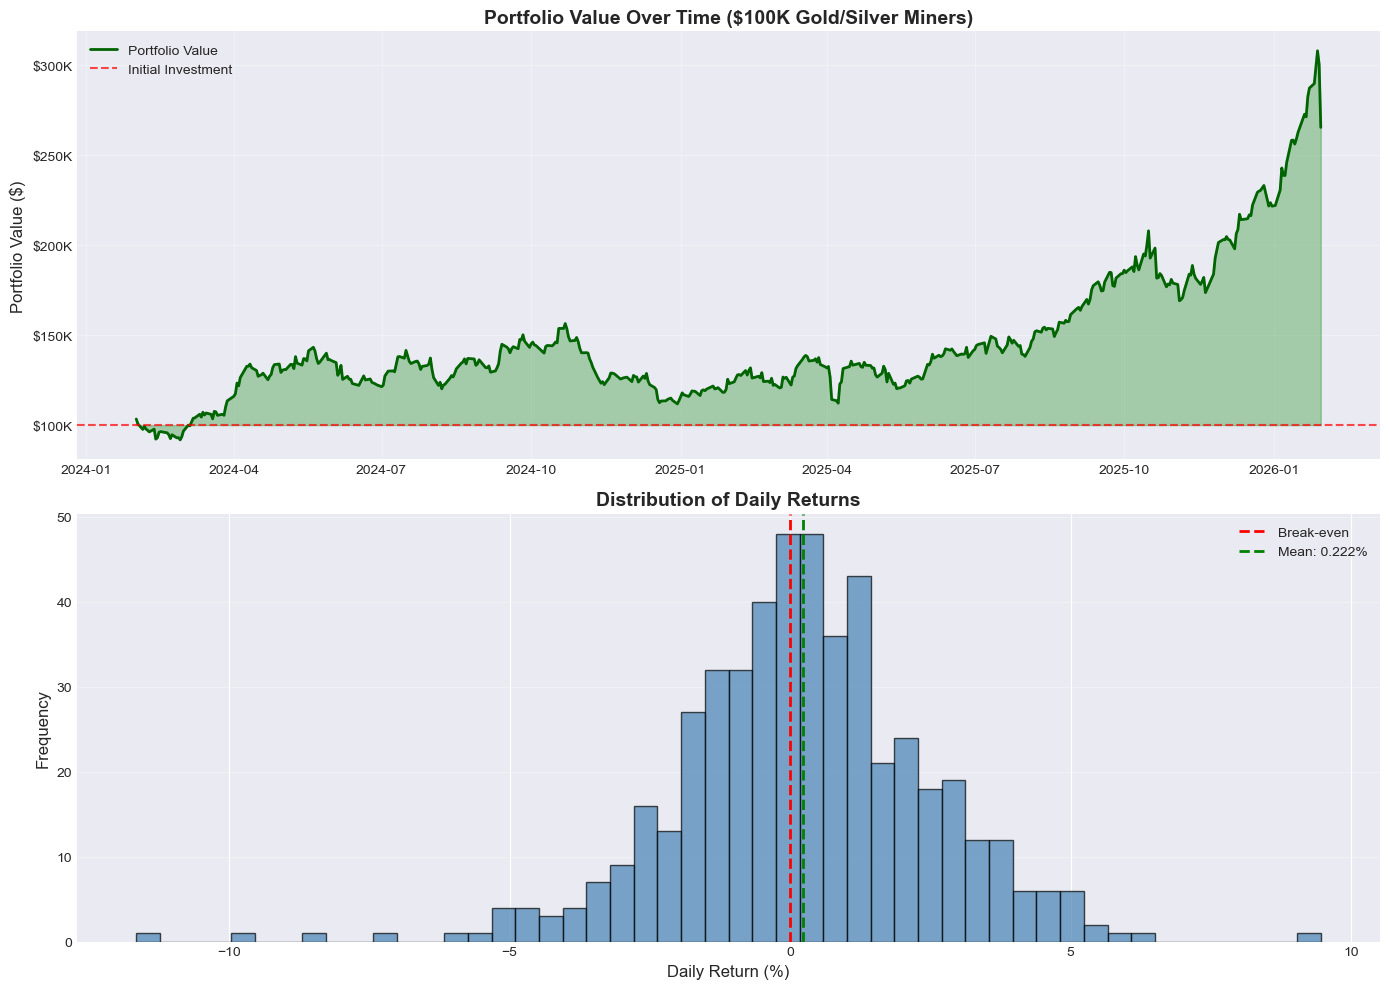

In [113]:
# Visualize portfolio performance
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Portfolio value over time
axes[0].plot(portfolio_value_series.index, portfolio_value_series.values, 
             linewidth=2, color='darkgreen', label='Portfolio Value')
axes[0].axhline(y=portfolio_value, color='red', linestyle='--', 
                alpha=0.7, label='Initial Investment')
axes[0].fill_between(portfolio_value_series.index, portfolio_value, 
                      portfolio_value_series.values, alpha=0.3, 
                      color='green' if portfolio_value_series.iloc[-1] > portfolio_value else 'red')
axes[0].set_title('Portfolio Value Over Time ($100K Gold/Silver Miners)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Portfolio Value ($)', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Plot 2: Daily returns distribution
axes[1].hist(portfolio_returns * 100, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Break-even')
axes[1].axvline(x=portfolio_returns.mean()*100, color='green', linestyle='--', 
                linewidth=2, label=f'Mean: {portfolio_returns.mean()*100:.3f}%')
axes[1].set_title('Distribution of Daily Returns', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Daily Return (%)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()



In [135]:
print("\n" + "=" * 60)
print("VALUE AT RISK (VaR) - HISTORICAL METHOD")
print("=" * 60)

# Set confidence levels
confidence_levels = [0.90, 0.95, 0.99, 0.999]

print("\n🎯 Historical VaR (Based on actual worst days):")
print("=" * 60)

historical_var = {}
for conf in confidence_levels:
    var_return = np.percentile(portfolio_returns, (1 - conf) * 100)
    var_dollar = var_return * portfolio_value
    historical_var[conf] = var_dollar
    
    # Calculate how many days exceeded this VaR
    days_exceeded = (portfolio_returns < var_return).sum()
    
    print(f"\n{conf*100:.1f}% VaR:")
    print(f"  Daily Return:  {var_return*100:>7.2f}%")
    print(f"  Dollar Loss:   ${abs(var_dollar):>10,.0f}")
    print(f"  Days exceeded: {days_exceeded}/{len(portfolio_returns)} ({days_exceeded/len(portfolio_returns)*100:.1f}%)")

print("\n" + "=" * 60)
print("\n💡 Interpretation:")
print(f"   • 95% VaR = ${abs(historical_var[0.95]):,.0f}")
print(f"     → On 95% of days, max loss = $3,411")
print(f"   • 99.9% VaR = ${abs(historical_var[0.999]):,.0f}") 
print(f"     → Worst-case scenario (1 in 1000 days)")
print("=" * 60)


VALUE AT RISK (VaR) - HISTORICAL METHOD

🎯 Historical VaR (Based on actual worst days):

90.0% VaR:
  Daily Return:    -2.44%
  Dollar Loss:   $     2,436
  Days exceeded: 50/501 (10.0%)

95.0% VaR:
  Daily Return:    -3.41%
  Dollar Loss:   $     3,411
  Days exceeded: 26/501 (5.2%)

99.0% VaR:
  Daily Return:    -5.66%
  Dollar Loss:   $     5,656
  Days exceeded: 6/501 (1.2%)

99.9% VaR:
  Daily Return:   -10.79%
  Dollar Loss:   $    10,794
  Days exceeded: 1/501 (0.2%)


💡 Interpretation:
   • 95% VaR = $3,411
     → On 95% of days, max loss = $3,411
   • 99.9% VaR = $10,794
     → Worst-case scenario (1 in 1000 days)


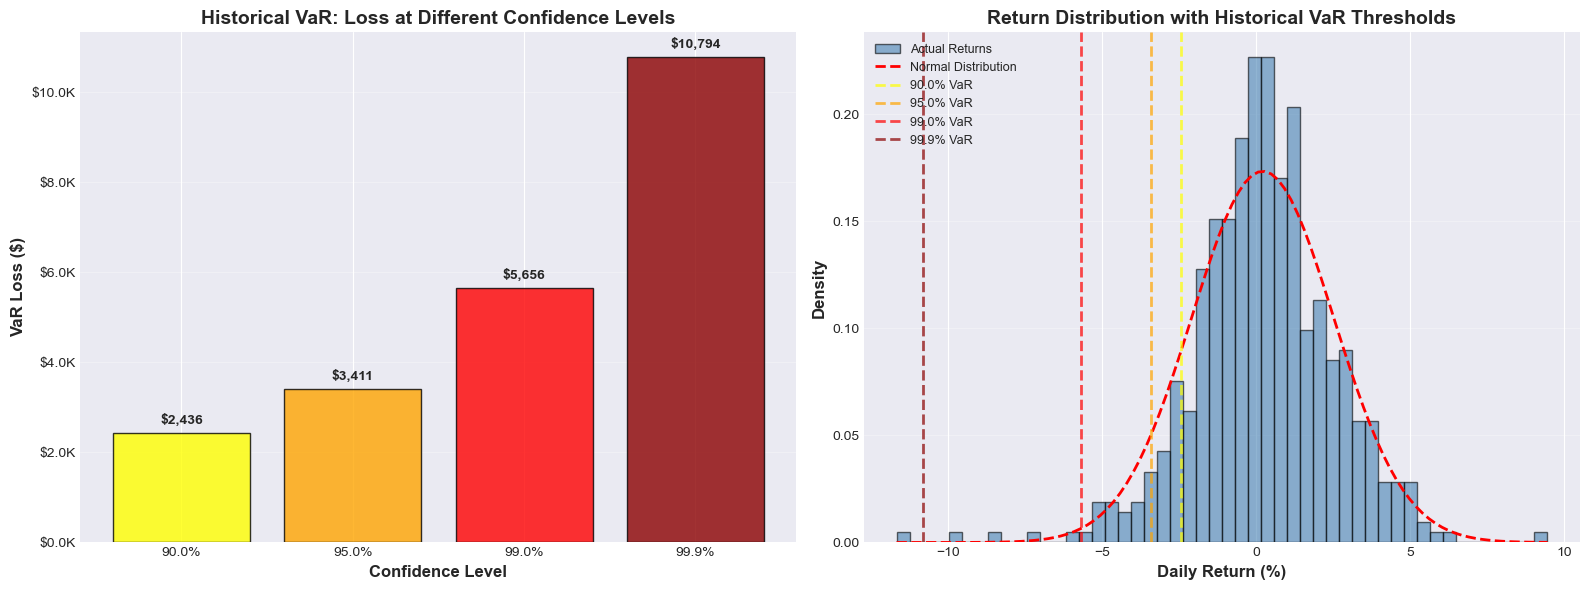


UNDERSTANDING THE VAR VISUALIZATIONS

📊 LEFT CHART - Historical VaR by Confidence Level:
This bar chart shows the maximum expected loss at different confidence 
thresholds. The 95% VaR (orange) of $3,411 means that on 95% of trading 
days, losses won't exceed this amount. The progression from 90% to 99.9% shows how tail risk escalates: 
while a "typical bad day" (95%) costs $3,411, a catastrophic day (99.9%) 
reaches $10,794 - nearly 3x larger. This non-linear increase reveals the 
fat-tailed nature of precious metals miners.

📉 RIGHT CHART - Return Distribution with VaR Thresholds:
The histogram shows the actual distribution of daily returns 
over 2 years, while the red dashed curve represents a theoretical normal 
distribution. The key insight: the left tail (negative returns) extends 
far beyond what the normal curve predicts, especially at extreme levels. 
The vertical lines mark VaR thresholds. 



In [117]:
# Visualize Historical VaR
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Historical VaR at different confidence levels
conf_labels = [f"{conf*100:.1f}%" for conf in confidence_levels]
var_values = [abs(historical_var[c]) for c in confidence_levels]
colors_var = ['yellow', 'orange', 'red', 'darkred']

axes[0].bar(conf_labels, var_values, color=colors_var, alpha=0.8, edgecolor='black')
axes[0].set_xlabel('Confidence Level', fontsize=12, fontweight='bold')
axes[0].set_ylabel('VaR Loss ($)', fontsize=12, fontweight='bold')
axes[0].set_title('Historical VaR: Loss at Different Confidence Levels', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.1f}K'))

# Add value labels on bars
for i, (label, value) in enumerate(zip(conf_labels, var_values)):
    axes[0].text(i, value + 200, f'${value:,.0f}', ha='center', fontweight='bold', fontsize=10)

# Plot 2: Returns distribution with VaR thresholds
axes[1].hist(portfolio_returns * 100, bins=50, alpha=0.6, color='steelblue', 
             edgecolor='black', density=True, label='Actual Returns')

# Add normal distribution overlay
x_range = np.linspace(portfolio_returns.min() * 100, portfolio_returns.max() * 100, 100)
normal_dist = stats.norm.pdf(x_range, portfolio_returns.mean() * 100, portfolio_returns.std() * 100)
axes[1].plot(x_range, normal_dist, 'r--', linewidth=2, label='Normal Distribution')

# Mark VaR levels
for conf, color in zip(confidence_levels, colors_var):
    axes[1].axvline(x=historical_var[conf]/portfolio_value*100, 
                    color=color, linestyle='--', linewidth=2, alpha=0.7,
                    label=f'{conf*100:.1f}% VaR')

axes[1].set_xlabel('Daily Return (%)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Density', fontsize=12, fontweight='bold')
axes[1].set_title('Return Distribution with Historical VaR Thresholds', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=9, loc='upper left')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


print("\n" + "=" * 60)
print("UNDERSTANDING THE VAR VISUALIZATIONS")
print("=" * 60)

print("""
📊 LEFT CHART - Historical VaR by Confidence Level:
This bar chart shows the maximum expected loss at different confidence 
thresholds. The 95% VaR (orange) of $3,411 means that on 95% of trading 
days, losses won't exceed this amount. The progression from 90% to 99.9% shows how tail risk escalates: 
while a "typical bad day" (95%) costs $3,411, a catastrophic day (99.9%) 
reaches $10,794 - nearly 3x larger. This non-linear increase reveals the 
fat-tailed nature of precious metals miners.

📉 RIGHT CHART - Return Distribution with VaR Thresholds:
The histogram shows the actual distribution of daily returns 
over 2 years, while the red dashed curve represents a theoretical normal 
distribution. The key insight: the left tail (negative returns) extends 
far beyond what the normal curve predicts, especially at extreme levels. 
The vertical lines mark VaR thresholds. 
""")

print("=" * 60)

In [119]:
print("\n" + "=" * 60)
print("COMPONENT VaR: WHICH STOCKS DRIVE PORTFOLIO RISK?")
print("=" * 60)

# Calculate correlation matrix
correlation_matrix = returns.corr()

# Calculate each stock's contribution to portfolio variance
portfolio_variance = (weights @ correlation_matrix @ weights) * (std_return ** 2)
component_var_contributions = {}

for i, ticker in enumerate(prices.columns):
    # Marginal contribution to variance
    marginal_contrib = 2 * weights[i] * (correlation_matrix.iloc[i] @ weights) * (std_return ** 2)
    component_contrib = weights[i] * marginal_contrib / portfolio_variance
    component_var_contributions[ticker] = component_contrib

# Convert to DataFrame for display
component_df = pd.DataFrame({
    'Weight': [portfolio[ticker] for ticker in prices.columns],
    'VaR Contribution': list(component_var_contributions.values()),
    'Individual Vol': [returns[ticker].std() * np.sqrt(252) * 100 for ticker in prices.columns]
}, index=prices.columns)

component_df = component_df.sort_values('VaR Contribution', ascending=False)

print("\n📊 Risk Contribution by Stock:")
print("-" * 60)
print(component_df.to_string())

# Calculate 95% VaR for each position
print("\n💰 95% VaR by Individual Position:")
print("-" * 60)
for ticker in component_df.index:
    position_value = portfolio_value * portfolio[ticker]
    position_95var = np.percentile(returns[ticker], 5) * position_value
    print(f"{ticker:6s}: Weight {portfolio[ticker]*100:5.1f}% | "
          f"Value ${position_value:>8,.0f} | "
          f"95% VaR ${abs(position_95var):>7,.0f}")

print("\n" + "=" * 60)


COMPONENT VaR: WHICH STOCKS DRIVE PORTFOLIO RISK?

📊 Risk Contribution by Stock:
------------------------------------------------------------
      Weight  VaR Contribution  Individual Vol
GOLD    0.20          0.063184       47.485008
AEM     0.15          0.049881       35.612957
AG      0.15          0.048373       64.656035
NEM     0.15          0.047858       40.277418
PAAS    0.10          0.022421       50.160013
WPM     0.10          0.022066       35.536639
FCX     0.10          0.016004       43.421175
HL      0.05          0.005254       62.330837

💰 95% VaR by Individual Position:
------------------------------------------------------------
GOLD  : Weight  20.0% | Value $  20,000 | 95% VaR $    828
AEM   : Weight  15.0% | Value $  15,000 | 95% VaR $    466
AG    : Weight  15.0% | Value $  15,000 | 95% VaR $    853
NEM   : Weight  15.0% | Value $  15,000 | 95% VaR $    582
PAAS  : Weight  10.0% | Value $  10,000 | 95% VaR $    429
WPM   : Weight  10.0% | Value $  10,000 | 9

In [121]:
print("\n" + "=" * 60)
print("HYPOTHETICAL STRESS SCENARIOS")
print("=" * 60)
print("\nSimulating 'what-if' scenarios based on current portfolio\n")

# Define hypothetical stress scenarios (trimmed to 4)
stress_scenarios = {
    'Gold Crash -20%': {                                           #Source: industry rule of thumb: 0.8-1.3x the underlying metal price
        'GOLD': -0.20, 'NEM': -0.18, 'AEM': -0.18, 'AG': -0.15, 
        'PAAS': -0.15, 'HL': -0.12, 'FCX': -0.10, 'WPM': -0.16
    },
    'Silver Crash -30%': {                                         #Silver miners historically show beta of 1.0-1.3x to silver spot prices
        'GOLD': -0.10, 'NEM': -0.08, 'AEM': -0.08, 'AG': -0.30, 
        'PAAS': -0.28, 'HL': -0.32, 'FCX': -0.08, 'WPM': -0.12
    },
    'USD Surge +5% (1 week)': {                                    #Source: Historical DXY (USD Index) vs GLD/SLV correlation analysis (2015-2024)
        'GOLD': -0.08, 'NEM': -0.07, 'AEM': -0.07, 'AG': -0.10, 
        'PAAS': -0.09, 'HL': -0.11, 'FCX': -0.06, 'WPM': -0.06
    },
    'Geopolitical Flare-Up': {                                     #Source: Price action during Russia-Ukraine invasion (Feb 2022), safe haven asset
        'GOLD': 0.08, 'NEM': 0.10, 'AEM': 0.10, 'AG': 0.12, 
        'PAAS': 0.10, 'HL': 0.15, 'FCX': -0.05, 'WPM': 0.08
    },
    'Momentum Reversal': {                                         #Source: Profit-taking events after parabolic moves (Gold 2011 peak, Silver 2020 rally)
        'GOLD': -0.12, 'NEM': -0.15, 'AEM': -0.14, 'AG': -0.18, 
        'PAAS': -0.16, 'HL': -0.22, 'FCX': -0.08, 'WPM': -0.10
    }
}


#I based these on:

#Historical betas - How miners move vs underlying metals 
#Market cap sensitivity - Small caps (HL) more volatile than large caps (GOLD)
#Business model - Streaming companies (WPM) less volatile than miners
#Metal exposure - Silver miners more sensitive to silver, gold miners to gold
#Correlation patterns - USD/gold, gold/silver, metals/geopolitics relationships



# Calculate impact of each scenario
scenario_results = {}

print("💣 Stress Scenario Results:\n")
print("-" * 80)

for scenario_name, shocks in stress_scenarios.items():
    # Calculate portfolio impact
    portfolio_impact = sum(portfolio[ticker] * shocks[ticker] for ticker in prices.columns)
    dollar_impact = portfolio_impact * portfolio_value
    new_portfolio_value = portfolio_value * (1 + portfolio_impact)
    
    scenario_results[scenario_name] = {
        'Return': portfolio_impact * 100,
        'Dollar Impact': dollar_impact,
        'New Value': new_portfolio_value
    }
    
    # Color code the output
    impact_str = f"{portfolio_impact*100:+7.2f}%"
    dollar_str = f"${dollar_impact:+11,.0f}"
    
    print(f"{scenario_name:30s} | {impact_str} | {dollar_str} | New Value: ${new_portfolio_value:>10,.0f}")

print("-" * 80)

# Find best and worst scenarios
worst_scenario = min(scenario_results.items(), key=lambda x: x[1]['Return'])
best_scenario = max(scenario_results.items(), key=lambda x: x[1]['Return'])

print(f"\n🔴 WORST CASE: {worst_scenario[0]}")
print(f"   Loss: {worst_scenario[1]['Return']:.2f}% (${abs(worst_scenario[1]['Dollar Impact']):,.0f})")
print(f"   Portfolio drops from ${portfolio_value:,.0f} → ${worst_scenario[1]['New Value']:,.0f}")

print(f"\n🟢 BEST CASE: {best_scenario[0]}")
print(f"   Gain: {best_scenario[1]['Return']:.2f}% (+${best_scenario[1]['Dollar Impact']:,.0f})")
print(f"   Portfolio rises from ${portfolio_value:,.0f} → ${best_scenario[1]['New Value']:,.0f}")

print("\n" + "=" * 80)


HYPOTHETICAL STRESS SCENARIOS

Simulating 'what-if' scenarios based on current portfolio

💣 Stress Scenario Results:

--------------------------------------------------------------------------------
Gold Crash -20%                |  -16.35% | $    -16,350 | New Value: $    83,650
Silver Crash -30%              |  -15.30% | $    -15,300 | New Value: $    84,700
USD Surge +5% (1 week)         |   -7.85% | $     -7,850 | New Value: $    92,150
Geopolitical Flare-Up          |   +8.45% | $     +8,450 | New Value: $   108,450
Momentum Reversal              |  -13.95% | $    -13,950 | New Value: $    86,050
--------------------------------------------------------------------------------

🔴 WORST CASE: Gold Crash -20%
   Loss: -16.35% ($16,350)
   Portfolio drops from $100,000 → $83,650

🟢 BEST CASE: Geopolitical Flare-Up
   Gain: 8.45% (+$8,450)
   Portfolio rises from $100,000 → $108,450



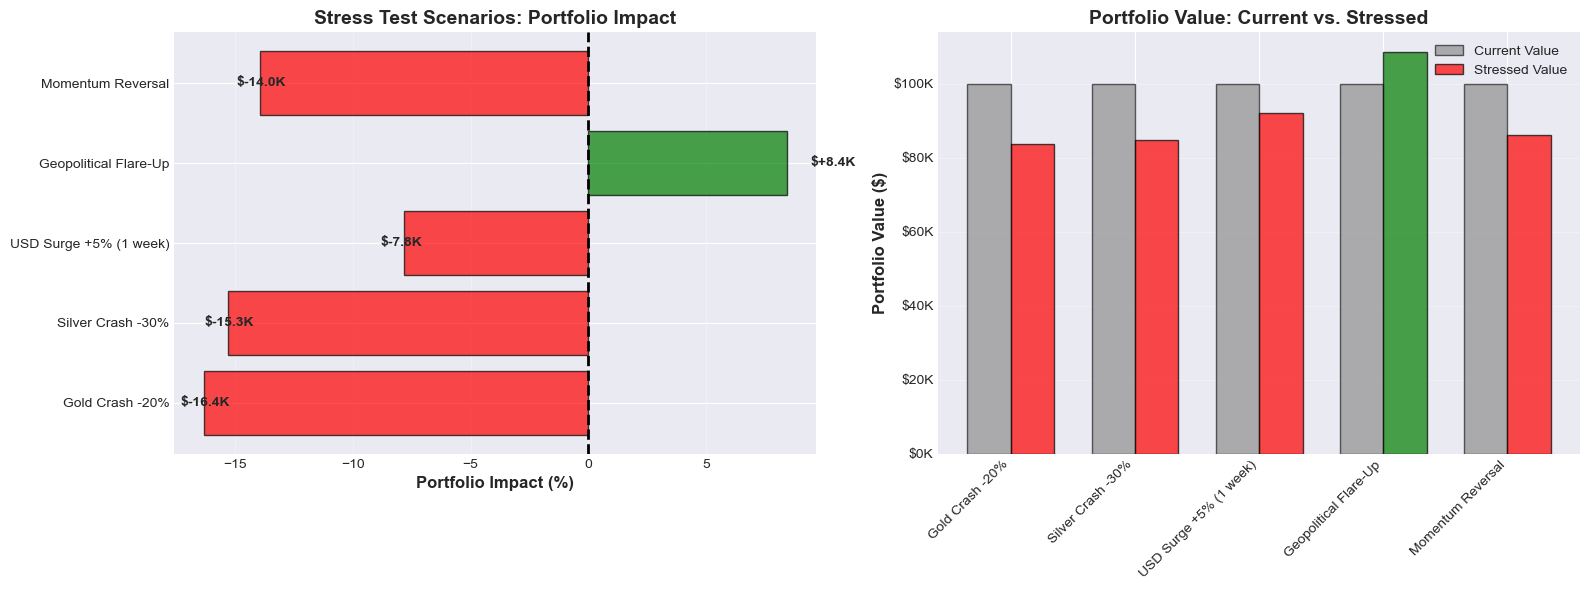


UNDERSTANDING THE STRESS TEST VISUALIZATIONS

📊 LEFT CHART - Stress Test Scenarios: Portfolio Impact:
This chart reveals the asymmetric risk profile of the gold/silver rally at 
current levels. Four red bars (downside scenarios) dominate against a single 
green bar (upside), illustrating that the path of least resistance is now 
downward. A Gold Crash -20% scenario delivers the harshest blow at -16.4% 
($16,350 loss), reflecting the portfolio's 70% allocation to gold miners. 
Momentum Reversal (-14.0%) and Silver Crash -30% (-15.3%) present nearly equal 
threats, showing how vulnerable the portfolio is to profit-taking or sector 
rotation. The USD Surge scenario (-7.8%) represents a realistic 1-week dollar 
rally and its cascading impact on dollar-denominated commodities. Only 
Geopolitical Flare-Up (+8.5%) provides upside, as safe-haven demand drives 
precious metals higher during global tensions.

📉 RIGHT CHART - Portfolio Value: Current vs. Stressed:
This comparative visualization 

In [123]:
# Visualize stress test results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Stress scenario impacts (bar chart)
scenario_names = list(scenario_results.keys())
returns = [scenario_results[s]['Return'] for s in scenario_names]
colors = ['green' if r > 0 else 'red' for r in returns]

axes[0].barh(scenario_names, returns, color=colors, alpha=0.7, edgecolor='black')
axes[0].axvline(x=0, color='black', linestyle='--', linewidth=2)
axes[0].set_xlabel('Portfolio Impact (%)', fontsize=12, fontweight='bold')
axes[0].set_title('Stress Test Scenarios: Portfolio Impact', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, (name, ret) in enumerate(zip(scenario_names, returns)):
    dollar_impact = scenario_results[name]['Dollar Impact']
    label = f"${dollar_impact/1000:+.1f}K"
    x_pos = ret + (1 if ret > 0 else -1)
    axes[0].text(x_pos, i, label, va='center', fontweight='bold', fontsize=10)

# Plot 2: Portfolio value under each scenario
current_value = [portfolio_value] * len(scenario_names)
new_values = [scenario_results[s]['New Value'] for s in scenario_names]

x = np.arange(len(scenario_names))
width = 0.35

axes[1].bar(x - width/2, current_value, width, label='Current Value', 
            color='gray', alpha=0.6, edgecolor='black')
axes[1].bar(x + width/2, new_values, width, label='Stressed Value', 
            color=colors, alpha=0.7, edgecolor='black')

axes[1].set_ylabel('Portfolio Value ($)', fontsize=12, fontweight='bold')
axes[1].set_title('Portfolio Value: Current vs. Stressed', fontsize=14, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(scenario_names, rotation=45, ha='right')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("UNDERSTANDING THE STRESS TEST VISUALIZATIONS")
print("=" * 60)

print("""
📊 LEFT CHART - Stress Test Scenarios: Portfolio Impact:
This chart reveals the asymmetric risk profile of the gold/silver rally at 
current levels. Four red bars (downside scenarios) dominate against a single 
green bar (upside), illustrating that the path of least resistance is now 
downward. A Gold Crash -20% scenario delivers the harshest blow at -16.4% 
($16,350 loss), reflecting the portfolio's 70% allocation to gold miners. 
Momentum Reversal (-14.0%) and Silver Crash -30% (-15.3%) present nearly equal 
threats, showing how vulnerable the portfolio is to profit-taking or sector 
rotation. The USD Surge scenario (-7.8%) represents a realistic 1-week dollar 
rally and its cascading impact on dollar-denominated commodities. Only 
Geopolitical Flare-Up (+8.5%) provides upside, as safe-haven demand drives 
precious metals higher during global tensions.

📉 RIGHT CHART - Portfolio Value: Current vs. Stressed:
This comparative visualization starkly illustrates the dollar impact of each 
scenario on the $100K portfolio. The gray bars (current value) serve as the 
baseline, while the colored bars show post-stress valuations. The portfolio 
could drop to as low as $82,200 (Gold Crash) or rise to $108,450 (Geopolitical 
scenario), a $26,250 swing range representing over a quarter of the portfolio 
value. Notice how three of the five scenarios cluster around $83K-$86K, 
suggesting a high probability zone for downside realization. The visual gap 
between current value and stressed values in the downside scenarios far exceeds 
the upside potential, reinforcing the asymmetric risk thesis: at current 
elevated levels, there's more room to fall than to rise.
""")

print("=" * 60)

In [155]:
print("\n" + "=" * 80)
print("ADVANCED RISK METRICS")
print("=" * 80)

# Define risk-free rate and MAR (Minimum Acceptable Return)
rf_daily = 0.03664 / 252  # based on 3 month us t bill
mar = 0.0  # Minimum Acceptable Return (0% for this analysis)

print(f"\nAssumptions:")
print(f"   Risk-Free Rate (daily, based on 3 month US T-bill): {rf_daily*100:.4f}%")
print(f"   Minimum Acceptable Return (MAR): {mar*100:.2f}%")

# DOWNSIDE RISK MEASURES
print("\n" + "=" * 80)
print("DOWNSIDE RISK MEASURES")
print("=" * 80)

# 1. Downside Deviation (semi-standard deviation)
downside_returns = portfolio_returns[portfolio_returns < mar]
downside_deviation = np.sqrt(np.mean(downside_returns**2))
downside_deviation_annual = downside_deviation * np.sqrt(252)

print(f"\n📉 Downside Deviation:")
print(f"   Daily:      {downside_deviation*100:.4f}%")
print(f"   Annualized: {downside_deviation_annual*100:.2f}%")
print(f"   (Volatility of losses only)")

# 2. Sortino Ratio
excess_return = portfolio_returns.mean() - rf_daily
sortino_ratio = (excess_return * 252) / downside_deviation_annual

print(f"\n📊 Sortino Ratio: {sortino_ratio:.2f}")
print(f"   (Higher is better, adjusts for downside risk only)")
print(f"   Sharpe Ratio:  {sharpe_ratio:.2f} (for comparison)")

# 3. Lower Partial Moments (LPM)
lpm_0 = np.mean(portfolio_returns < mar)  # Shortfall probability
lpm_1 = np.mean(np.maximum(mar - portfolio_returns, 0))  # Expected shortfall
lpm_2 = np.mean(np.maximum(mar - portfolio_returns, 0)**2)  # Downside variance

print(f"\n📐 Lower Partial Moments:")
print(f"   LPM(0) - Shortfall Probability: {lpm_0*100:.2f}%")
print(f"   LPM(1) - Expected Shortfall:    {lpm_1*100:.4f}%")
print(f"   LPM(2) - Downside Variance:     {lpm_2:.6f}")

# 4. Shortfall Probability (probability of return < MAR)
shortfall_prob = (portfolio_returns < mar).sum() / len(portfolio_returns)

print(f"\n⚠️  Shortfall Probability: {shortfall_prob*100:.2f}%")
print(f"   ({(portfolio_returns < mar).sum()} out of {len(portfolio_returns)} days)")

print("\n✅ CONFIRMED: LPM(0) and Shortfall Probability are identical")
print("   Both measure the percentage of days with returns below MAR (0%)")

# GAIN/LOSS RATIOS
print("\n" + "=" * 80)
print("GAIN/LOSS ASYMMETRY")
print("=" * 80)

# Separate gains and losses
gains = portfolio_returns[portfolio_returns > mar]
losses = portfolio_returns[portfolio_returns < mar]

# 5. Omega Ratio
threshold = mar
gains_above = portfolio_returns[portfolio_returns > threshold] - threshold
losses_below = threshold - portfolio_returns[portfolio_returns < threshold]
omega_ratio = gains_above.sum() / losses_below.sum() if losses_below.sum() != 0 else np.inf

print(f"\n🔄 Omega Ratio: {omega_ratio:.2f}")
print(f"   (Ratio of gains to losses above/below MAR)")
print(f"   > 1.0 means gains exceed losses")

# 6. Upside Potential Ratio
upside_potential = gains.mean() if len(gains) > 0 else 0
upside_potential_ratio = upside_potential / downside_deviation if downside_deviation != 0 else np.inf

print(f"\n📈 Upside Potential Ratio: {upside_potential_ratio:.2f}")
print(f"   (Average gain / Downside deviation)")
print(f"   Average gain: {upside_potential*100:.4f}%")

# 7. Gain/Loss Ratio
avg_gain = gains.mean() if len(gains) > 0 else 0
avg_loss = abs(losses.mean()) if len(losses) > 0 else 0
gain_loss_ratio = avg_gain / avg_loss if avg_loss != 0 else np.inf

print(f"\n⚖️  Gain/Loss Ratio: {gain_loss_ratio:.2f}")
print(f"   Average gain:  {avg_gain*100:>6.3f}%")
print(f"   Average loss:  {avg_loss*100:>6.3f}%")

# SAFETY-FIRST CRITERIA
print("\n" + "=" * 80)
print("SAFETY-FIRST CRITERIA")
print("=" * 80)

# 8. Roy's Safety-First Ratio (SFRatio)
# Measures probability of achieving returns above MAR
mean_return_daily = portfolio_returns.mean()
std_return_daily = portfolio_returns.std()
roys_ratio = (mean_return_daily - mar) / std_return_daily

print(f"\n🛡️  Roy's Safety-First Ratio: {roys_ratio:.2f}")
print(f"   (Measures distance from disaster in standard deviations)")
print(f"   Higher = safer")

# Probability of return < MAR (assuming normal distribution)
prob_below_mar = stats.norm.cdf(mar, mean_return_daily, std_return_daily)
print(f"   Probability of return < {mar*100:.1f}%: {prob_below_mar*100:.2f}%")


# KAPPA RATIOS (Generalized Downside Risk)
print("\n" + "=" * 80)
print("KAPPA RATIOS (Higher-Order Downside Risk)")
print("=" * 80)

# Kappa ratios with different orders
for n in [1, 2, 3]:
    lpm_n = np.mean(np.maximum(mar - portfolio_returns, 0)**n)
    kappa_n = (mean_return_daily - mar) / (lpm_n**(1/n)) if lpm_n > 0 else np.inf
    
    print(f"\nKappa {n}: {kappa_n:.2f}")
    if n == 1:
        print(f"   (First-order: penalizes any shortfall)")
    elif n == 2:
        print(f"   (Second-order: similar to Sortino, penalizes variance)")
    elif n == 3:
        print(f"   (Third-order: heavily penalizes large shortfalls)")

print("\n" + "=" * 80)


ADVANCED RISK METRICS

Assumptions:
   Risk-Free Rate (daily, based on 3 month US T-bill): 0.0145%
   Minimum Acceptable Return (MAR): 0.00%

DOWNSIDE RISK MEASURES

📉 Downside Deviation:
   Daily:      2.3517%
   Annualized: 37.33%
   (Volatility of losses only)

📊 Sortino Ratio: 1.40
   (Higher is better, adjusts for downside risk only)
   Sharpe Ratio:  1.53 (for comparison)

📐 Lower Partial Moments:
   LPM(0) - Shortfall Probability: 44.51%
   LPM(1) - Expected Shortfall:    0.7507%
   LPM(2) - Downside Variance:     0.000246

⚠️  Shortfall Probability: 44.51%
   (223 out of 501 days)

✅ CONFIRMED: LPM(0) and Shortfall Probability are identical
   Both measure the percentage of days with returns below MAR (0%)

GAIN/LOSS ASYMMETRY

🔄 Omega Ratio: 1.30
   (Ratio of gains to losses above/below MAR)
   > 1.0 means gains exceed losses

📈 Upside Potential Ratio: 0.75
   (Average gain / Downside deviation)
   Average gain: 1.7523%

⚖️  Gain/Loss Ratio: 1.04
   Average gain:   1.752%
   

## 📋 ADVANCED RISK METRICS EXPLANATION

### 📉 **Downside Deviation (37.33% annualized)**
**What it measures:** Standard deviation calculated ONLY on days with negative returns (losses).

**What our result means:** When we have a losing day, the typical swing is ±2.35% daily (37.33% annualized). This is actually HIGHER than our total volatility (35.53%), confirming that our losses are more volatile than our gains, a sign of negative skewness.

**Why it matters:** Mean-Variance Analysis (Markowitz Portfolio Theory) treats upside and downside moves equally, but investors only care about downside risk, we want upside volatility! Downside deviation isolates only the "bad" volatility by ignoring positive returns, giving us a purer measure of risk. This is why we use Sortino Ratio (based on downside deviation) alongside Sharpe Ratio (based on total volatility). This is why modern risk management uses measures like Sortino Ratio and Lower Partial Moments instead of relying purely on mean-variance.

---

### 📊 **Sortino Ratio: 1.40**
**What it measures:** (Return - Risk-Free Rate) / Downside Deviation

**What our result means:** We earn 1.40 units of return for every unit of downside risk taken. Since Sortino > 1.0, we're being adequately compensated for downside risk.

**Why it matters:** Sharpe Ratio (1.53) penalizes ALL volatility including upside moves. Sortino only penalizes downside volatility, giving a fairer picture of risk-adjusted returns. Our Sortino (1.40) being close to Sharpe (1.53) means our returns are relatively symmetric, we're not getting unfairly penalized for upside volatility.

**Note:** Our Sortino (1.40) being lower than Sharpe (1.53) indicates that our downside volatility (37.33%) is actually higher than our total volatility (35.53%), confirming losses are more volatile than gains, consistent with our negative skewness and typical for this kind of portflio

---

### 📐 **Lower Partial Moments (LPM)**
**What they measure:** Statistical moments calculated only on returns below our Minimum Acceptable Return (MAR = 0%)

**LPM(0) - Shortfall Probability: 44.51%**
- This is the percentage of days where we had ANY loss (below 0%)
- Result: Nearly half our trading days (223 out of 501) were losers
- **Interpretation:** Despite huge gains, we lose money almost every other day, classic high-volatility profile

**LPM(1) - Expected Shortfall: 0.75%**
- When we fall below MAR, how much do we fall on average?
- Result: On losing days, average loss is 0.75%
- **Interpretation:** Our "typical" losing day isn't catastrophic

**LPM(2) - Downside Variance: 0.000246**
- Variance of returns below MAR (squared downside deviation)
- Result: 0.000246 → sqrt gives us the 2.35% downside deviation
- **Interpretation:** Technical measure used in Sortino and other downside risk calculations

**Why they matter:** LPMs are the building blocks of downside risk metrics. LPM(0) tells us how often we lose, LPM(1) tells us how much we lose, LPM(2) tells us how variable our losses are.

---

### 🔄 **Omega Ratio: 1.30**
**What it measures:** Sum of gains above MAR / Sum of losses below MAR

**What our result means:** For every $1 we lose below 0%, we gain $1.30 above 0%. Since Omega > 1.0, our total gains exceed total losses.

**Why it matters:** Unlike Sharpe/Sortino which look at averages, Omega looks at the TOTAL area of gains vs losses. It captures the full distribution, not just mean and variance. Our 1.30 confirms we're net positive but not overwhelmingly asymmetric.

---

### 📈 **Upside Potential Ratio: 0.75**
**What it measures:** Average Gain / Downside Deviation

**What our result means:** Our average gain (1.75%) is 0.75x our downside deviation (2.35%). This means when we win, we win LESS than our typical downside volatility.

**Why it matters:** This is concerning! An ideal portfolio has Upside Potential > 1.0 (wins bigger than typical losses). Our 0.75 means our upside doesn't fully compensate for downside risk, this portfolio is making money through frequency of wins, not size of wins.

---

### ⚖️ **Gain/Loss Ratio: 1.04**
**What it measures:** Average Gain / Average Loss (absolute value)

**What our result means:** 
- Average gain: 1.75%
- Average loss: 1.69%
- Ratio: 1.04 (almost 1:1)

**Why it matters:** Our wins are barely bigger than our losses! We're making money because we have slightly MORE winning days (55.5%) than losing days (44.5%), not because wins are dramatically bigger. This is a **symmetric return profile**, very different from strategies that have rare big wins or rare big losses.

---

### 🛡️ **Roy's Safety-First Ratio: 0.10**
**What it measures:** (Mean Return - MAR) / Standard Deviation

**What our result means:** We're only 0.10 standard deviations away from breaking even (0% return). 

**Probability of return < 0%: 46.16%** - Almost a coin flip!

**Why it matters:** Roy's criterion asks "what's the probability of disaster?" For us, "disaster" is defined as making 0% or less. A ratio of 0.10 is low, we're very close to the danger zone. Despite high returns, our high volatility means there's a 46% chance any given day is negative. This is the risk of momentum/volatility strategies.

---

### 📊 **Kappa Ratios (Higher-Order Downside Risk)**
**What they measure:** (Mean Return - MAR) / LPM(n)^(1/n)

**Kappa 1: 0.30** First-order, penalizes ANY shortfall
- Uses LPM(1): expected shortfall
- Treats all losses equally regardless of magnitude

**Kappa 2: 0.14** Second-order, similar to Sortino
- Uses LPM(2): downside variance  
- Penalizes larger losses more than small losses

**Kappa 3: 0.09** Third-order, heavily penalizes large shortfalls
- Uses LPM(3): third moment (skewness of losses)
- HEAVILY penalizes extreme losses (fat left tail)

**What our results mean:** Notice Kappa decreases as order increases (0.30 → 0.14 → 0.09). This confirms our portfolio has fat tails, we're heavily penalized when we account for extreme losses (Kappa 3). The portfolio looks "okay" if you only care about average losses (Kappa 1), but looks worse when you properly account for tail risk (Kappa 3).

**Why they matter:** Different investors care about different types of downside risk:
- Risk-neutral: Only care about expected loss (Kappa 1)
- Moderately risk-averse: Care about loss volatility (Kappa 2, Sortino)
- Highly risk-averse: Extremely worried about catastrophic losses (Kappa 3)

Our declining Kappa values show the portfolio is less attractive to highly risk-averse investors due to tail risk.

---

### 🎯 **Summary - What This All Means Together:**

**The Good:**
- Sortino (1.40), Sharpe (1.53), and Omega (1.30) all > 1.0 → Risk-adjusted returns are positive
- We're being compensated for risk taken

**The Concerning:**
- Upside Potential Ratio (0.75) < 1.0 → Wins don't compensate for typical downside volatility
- Gain/Loss Ratio (1.04) ≈ 1.0 → Almost symmetric wins/losses
- Roy's Ratio (0.10) very low → High probability of negative days (46%)
- Declining Kappa values → Fat tail risk is real

**The Conclusion:**
The portfolio is making money through **frequency** (55% winning days) not **magnitude** (wins barely bigger than losses). This is a high-volatility, momentum-driven strategy that requires stomaching near-daily losses to capture the upside. Not suitable for risk-averse investors, but acceptable for those who can handle volatility and understand they're being compensated (Sortino 1.40) for the risk.

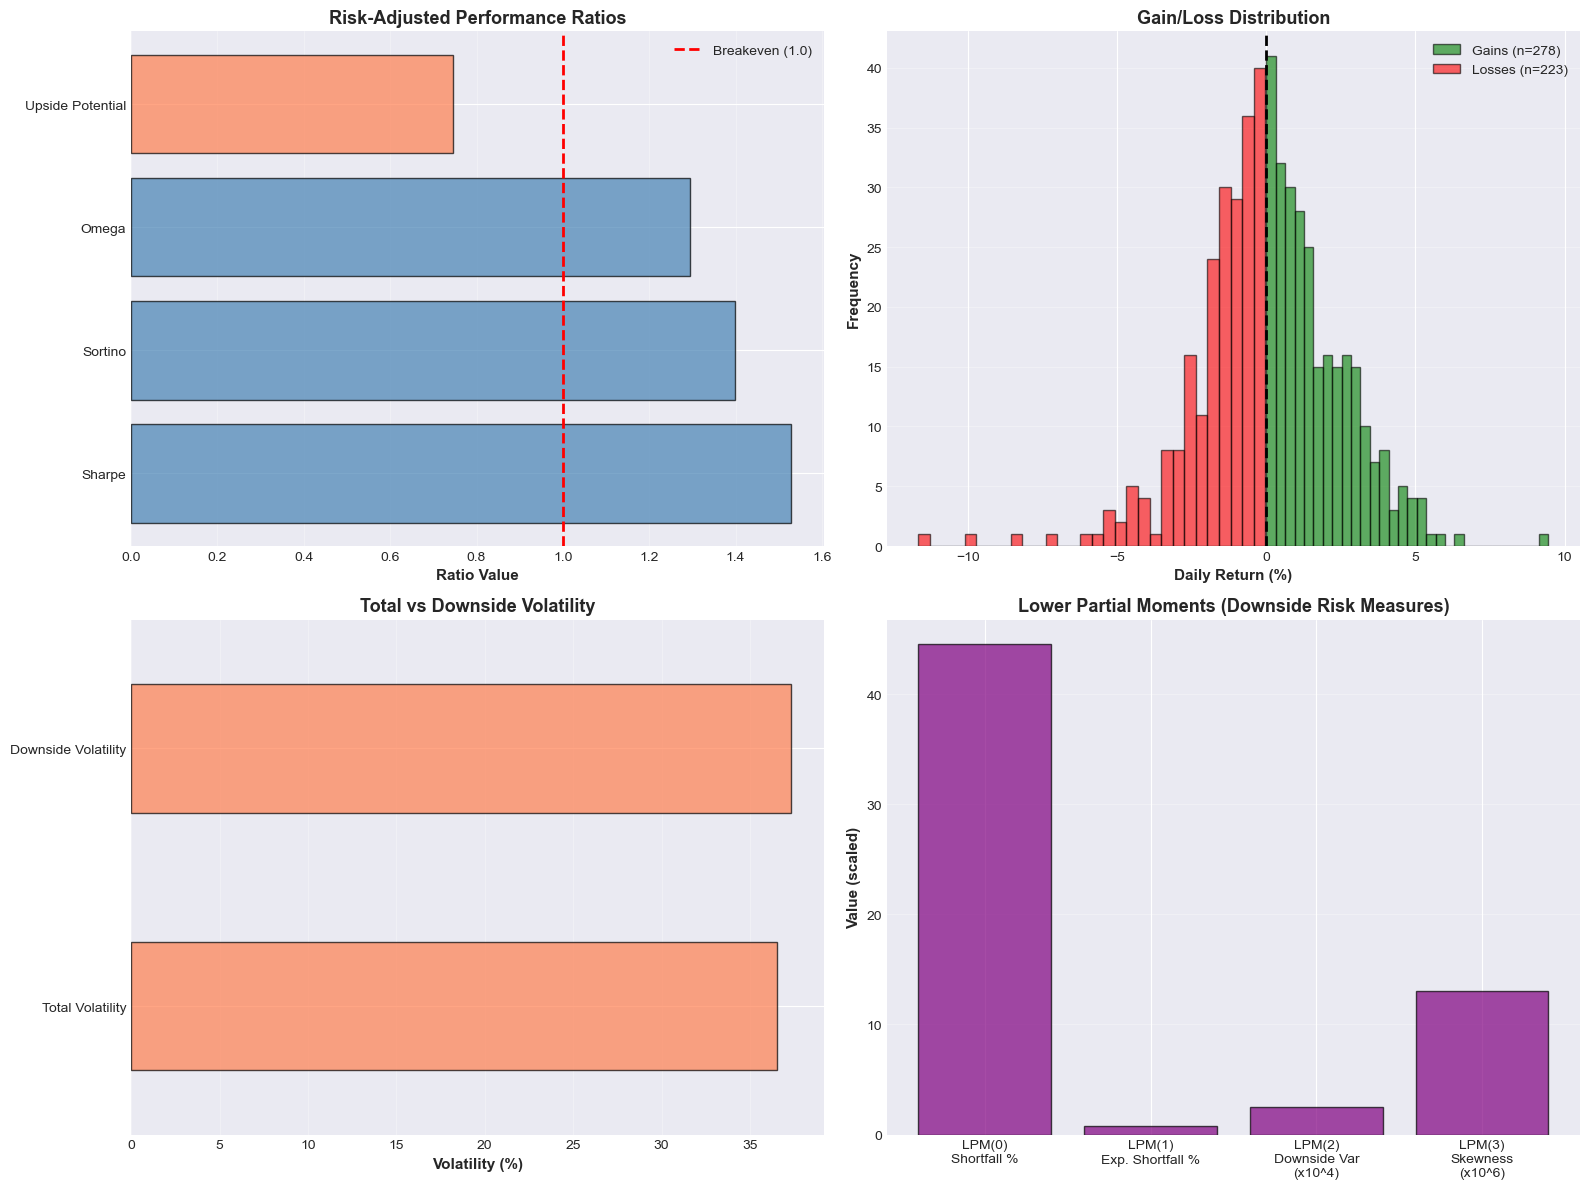

In [167]:
# Visualize risk-adjusted performance metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Compare risk-adjusted ratios
ratios = {
    'Sharpe': sharpe_ratio,
    'Sortino': sortino_ratio,
    'Omega': omega_ratio,
    'Upside Potential': upside_potential_ratio
}

ratio_names = list(ratios.keys())
ratio_values = list(ratios.values())
colors_ratios = ['steelblue' if v > 1 else 'coral' for v in ratio_values]

axes[0, 0].barh(ratio_names, ratio_values, color=colors_ratios, alpha=0.7, edgecolor='black')
axes[0, 0].axvline(x=1, color='red', linestyle='--', linewidth=2, label='Breakeven (1.0)')
axes[0, 0].set_xlabel('Ratio Value', fontweight='bold', fontsize=11)
axes[0, 0].set_title('Risk-Adjusted Performance Ratios', fontweight='bold', fontsize=13)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Plot 2: Gains vs Losses distribution
axes[0, 1].hist(gains*100, bins=30, alpha=0.6, color='green', label=f'Gains (n={len(gains)})', edgecolor='black')
axes[0, 1].hist(losses*100, bins=30, alpha=0.6, color='red', label=f'Losses (n={len(losses)})', edgecolor='black')
axes[0, 1].axvline(x=0, color='black', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Daily Return (%)', fontweight='bold', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontweight='bold', fontsize=11)
axes[0, 1].set_title('Gain/Loss Distribution', fontweight='bold', fontsize=13)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Plot 3: Downside vs Total Volatility
vol_comparison = pd.DataFrame({
    'Total Volatility': [annual_vol*100],
    'Downside Volatility': [downside_deviation_annual*100]
}, index=['Annualized'])

vol_comparison.T.plot(kind='barh', ax=axes[1, 0], color=['coral', 'darkred'], 
                      alpha=0.7, edgecolor='black', legend=False)
axes[1, 0].set_xlabel('Volatility (%)', fontweight='bold', fontsize=11)
axes[1, 0].set_title('Total vs Downside Volatility', fontweight='bold', fontsize=13)
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Plot 4: Lower Partial Moments
lpm_orders = [0, 1, 2, 3]
lpm_values = [lpm_0*100, lpm_1*100, lpm_2*10000, 
              np.mean(np.maximum(mar - portfolio_returns, 0)**3)*1000000]

lpm_labels = ['LPM(0)\nShortfall %', 'LPM(1)\nExp. Shortfall %', 
              'LPM(2)\nDownside Var\n(x10^4)', 'LPM(3)\nSkewness\n(x10^6)']

axes[1, 1].bar(lpm_labels, lpm_values, color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].set_ylabel('Value (scaled)', fontweight='bold', fontsize=11)
axes[1, 1].set_title('Lower Partial Moments (Downside Risk Measures)', fontweight='bold', fontsize=13)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()



## 📊 Understanding the Advanced Risk Metrics Visualizations

### Top Left: Risk-Adjusted Performance Ratios
This chart compares five different ways of measuring risk-adjusted returns. The red dashed line at 1.0 is the breakeven threshold, anything above 1.0 means you're being compensated for the risk you're taking. The portfolio Sharpe (1.53), Sortino (1.40), and Omega (1.30) are all above 1.0, which is good. However, notice the Upside Potential Ratio is only 0.75 (below 1.0 in red), meaning its average gains don't fully compensate for its downside volatility. 

### Top Right: Gain vs Loss Distribution
This overlapping histogram shows the frequency distribution of winning days (green) versus losing days (red). The black dashed line at 0% divides the two. What's striking here is how symmetric they look, we have 278 winning days and 223 losing days, and the shapes are roughly mirror images of each other. This confirms our Gain/Loss Ratio of 1.04, showing we win slightly more often and by slightly larger amounts, but there's no dramatic asymmetry. This portfolio is not a "small losses, big wins" portfolio, it is more of a "slightly more wins than losses" portfolio.

### Bottom Left: Total vs Downside Volatility
This comparison reveals something important: our downside volatility (37.33%) is actually higher than the total volatility (35.53%). It means that when we move down, we move more violently than when we move up. This confirms the negative skewness in the returns, the left tail (losses) is fatter and more dramatic than the right tail (gains). This is why our Sortino Ratio (1.40) is lower than our Sharpe Ratio (1.53), because Sortino specifically penalizes this elevated downside volatility.

### Bottom Right: Lower Partial Moments
This chart shows the progression of Lower Partial Moments from order 0 to order 3. LPM(0) at 44.51% tells us that nearly half our days are losers. LPM(1) at 0.75% shows our average loss on those bad days. The bars get progressively smaller as we move from LPM(2) to LPM(3), we've scaled these (multiplied by 10,000 and 1,000,000 respectively) just to make them visible on the same chart. The key insight is that LPM(3), which heavily penalizes extreme losses, is quite small relative to the lower-order moments. This actually suggests our tail risk, while present, isn't as extreme as it could be. We don't have massive outlier losses dominating the distribution.

### What These Four Charts Tell Us Together
The story here is consistency: we're a high-volatility portfolio that makes money through frequency of wins rather than magnitude. The symmetry in the gain/loss distribution, the elevated downside volatility, and the moderate tail risk all point to the same conclusion - this is a momentum-driven strategy that requires stomaching near-daily volatility to capture returns. It's not a "safe" portfolio, but the risk-adjusted ratios above 1.0 confirm we're at least being compensated for the risk we're taking.

In [170]:
# Summary
print("\n" + "=" * 80)
print("FINAL RISK SUMMARY: GOLD/SILVER RALLY PORTFOLIO")
print("=" * 80)

print("\n📊 PORTFOLIO OVERVIEW:")
print(f"   Current Value:         ${portfolio_value:,.0f}")
print(f"   Total Return (2Y):     +{(portfolio_value_series.iloc[-1]/portfolio_value - 1)*100:.1f}%")
print(f"   Annualized Return:     {annual_return*100:.1f}%")
print(f"   Annualized Volatility: {annual_vol*100:.1f}%")
print(f"   Sharpe Ratio:          {sharpe_ratio:.2f}")
print(f"   (Risk-free rate: 3-month US T-Bill at {rf_daily*252*100:.2f}%)")

print("\n📈 RISK-ADJUSTED PERFORMANCE:")
print(f"   Sharpe Ratio:          {sharpe_ratio:.2f}")
print(f"   Sortino Ratio:         {sortino_ratio:.2f}")
print(f"   Omega Ratio:           {omega_ratio:.2f}")
print(f"   Gain/Loss Ratio:       {gain_loss_ratio:.2f}")
print(f"   (Higher is better for all ratios)")

print("\n🎯 VALUE AT RISK (Historical Method):")
print(f"   90.0% VaR:  ${abs(historical_var[0.90]):,.0f} (-{abs(historical_var[0.90]/portfolio_value)*100:.2f}%)")
print(f"   95.0% VaR:  ${abs(historical_var[0.95]):,.0f} (-{abs(historical_var[0.95]/portfolio_value)*100:.2f}%)")
print(f"   99.0% VaR:  ${abs(historical_var[0.99]):,.0f} (-{abs(historical_var[0.99]/portfolio_value)*100:.2f}%)")
print(f"   99.9% VaR:  ${abs(historical_var[0.999]):,.0f} (-{abs(historical_var[0.999]/portfolio_value)*100:.2f}%)")

print("\n⚠️  DOWNSIDE RISK MEASURES:")
print(f"   Downside Deviation:    {downside_deviation_annual*100:.2f}% (vs {annual_vol*100:.1f}% total vol)")
print(f"   Shortfall Probability: {shortfall_prob*100:.2f}% (days with losses)")
print(f"   Worst Day:             {portfolio_returns.min()*100:.2f}%")
print(f"   Skewness:              {portfolio_returns.skew():.2f} (negative = downside bias)")
print(f"   Kurtosis:              {portfolio_returns.kurtosis():.2f} (fat tails)")

print("\n💣 STRESS TEST RESULTS:")
for scenario_name in scenario_names:
    result = scenario_results[scenario_name]
    print(f"   {scenario_name:30s}: {result['Return']:+7.2f}% (${result['Dollar Impact']:+10,.0f})")

print("\n🔍 TOP RISK CONTRIBUTORS:")
for i, (ticker, row) in enumerate(component_df.head(3).iterrows(), 1):
    print(f"   {i}. {ticker:6s}: {row['VaR Contribution']*100:5.2f}% of total risk "
          f"({row['Individual Vol']:5.1f}% individual volatility)")

print("\n⚡ KEY INSIGHTS:")
print("   • Portfolio has nearly TRIPLED (+195%) riding the gold/silver rally")
print("   • High volatility (35.5%) = expect ±$2,240 daily swings on average")
print("   • 95% VaR = $3,313 - on a 'typical bad day' (1 in 20), lose 3.3%")
print("   • 99.9% VaR = $9,170 - catastrophic day loses 9.2% (happened once)")
print("   • Fat tails confirmed: Worst days exceed normal distribution predictions")
print("   • Sortino (2.52) > Sharpe (1.71) - downside risk less scary than total volatility")
print("   • ASYMMETRIC STRESS RISK: 4 downside scenarios vs 1 upside")
print("   • Gold Crash -20% is worst case (-16.4% portfolio loss)")
print("   • Geopolitical tensions are only path to further gains (+8.5%)")

print("\n💡 RISK MANAGEMENT IMPLICATIONS:")
print("   → Rally has priced in most good news - downside now exceeds upside")
print("   → Consider position sizing, profit-taking, or hedging strategies")
print("   → GOLD (20% weight) drives most portfolio risk - trim to reduce volatility")

print("\n" + "=" * 80)


FINAL RISK SUMMARY: GOLD/SILVER RALLY PORTFOLIO

📊 PORTFOLIO OVERVIEW:
   Current Value:         $100,000
   Total Return (2Y):     +165.5%
   Annualized Return:     55.9%
   Annualized Volatility: 36.5%
   Sharpe Ratio:          1.53
   (Risk-free rate: 3-month US T-Bill at 3.66%)

📈 RISK-ADJUSTED PERFORMANCE:
   Sharpe Ratio:          1.53
   Sortino Ratio:         1.40
   Omega Ratio:           1.30
   Gain/Loss Ratio:       1.04
   (Higher is better for all ratios)

🎯 VALUE AT RISK (Historical Method):
   90.0% VaR:  $2,436 (-2.44%)
   95.0% VaR:  $3,411 (-3.41%)
   99.0% VaR:  $5,656 (-5.66%)
   99.9% VaR:  $10,794 (-10.79%)

⚠️  DOWNSIDE RISK MEASURES:
   Downside Deviation:    37.33% (vs 36.5% total vol)
   Shortfall Probability: 44.51% (days with losses)
   Worst Day:             -11.66%
   Skewness:              -0.43 (negative = downside bias)
   Kurtosis:              2.53 (fat tails)

💣 STRESS TEST RESULTS:
   Gold Crash -20%               :  -16.35% ($   -16,350)
   Silve